<a href="https://colab.research.google.com/github/angrybird05/pyTorch/blob/main/Computer_vision_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## computer vision



##computer vision libraries

import torch
from torch import nn
import torchvision
from torchvision import transforms
from torchvision.transforms import ToTensor

##import matplotlib for visualization
import matplotlib.pyplot as plt



In [3]:
##getting data using data set fashion mnist
from torchvision import datasets

train_data = datasets.FashionMNIST(
    root="data",#where to downloade data
    train=True,#do we want traning data set
    download=True,#do we want to download yes/no
    transform=transforms.ToTensor(),#how do we want to transform the data
    target_transform=None  #how do we want to transform the labeles/targets?
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor(),
    target_transform=None
)
len(train_data) ,len(test_data)

100%|██████████| 26.4M/26.4M [00:01<00:00, 16.6MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 308kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.68MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.84MB/s]


(60000, 10000)

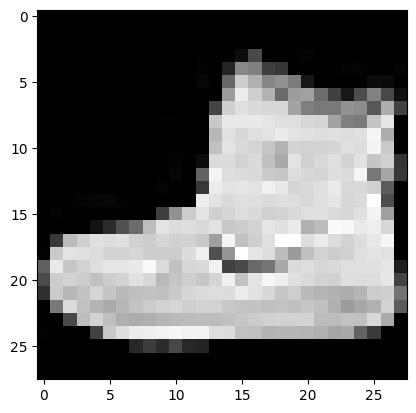

In [4]:
from numpy import imag
## traning example
image,label = train_data[0]
plt.imshow(image.squeeze(),cmap="gray")

In [5]:
image,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
image.shape

torch.Size([1, 28, 28])

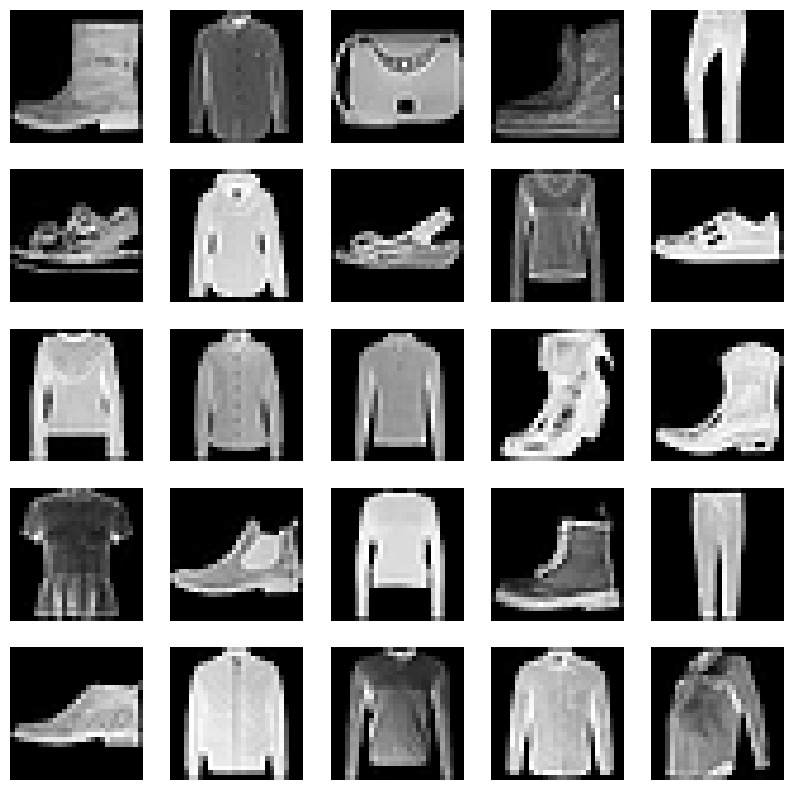

In [9]:
##plot more images
torch.manual_seed(42)
plt.figure(figsize=(10,10))
rows,cols = 5,5
for i in range(1,rows*cols+1):
  random_idx = torch.randint(0,len(train_data),(1,)).item()
  image,label = train_data[random_idx]
  plt.subplot(rows,cols,i)
  plt.imshow(image.squeeze(),cmap="gray")
  plt.axis(False)

In [10]:
## prepare data

import torch
from torch.utils.data import DataLoader

## set the batch size
BATCH_SIZE = 32

#turn dataset into iterables
train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)


print(f"Dataloaders:{train_dataloader,test_dataloader}")

print(f"Length of train dataloader:{len(train_dataloader)} batches of {BATCH_SIZE}")

print(f"Length of test dataloader:{len(test_dataloader)} batches of {BATCH_SIZE}")


Dataloaders:(<torch.utils.data.dataloader.DataLoader object at 0x786c85a9cf20>, <torch.utils.data.dataloader.DataLoader object at 0x786c888f86e0>)
Length of train dataloader:1875 batches of 32
Length of test dataloader:313 batches of 32


In [11]:
train_features_batch,train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch

(torch.Size([32, 1, 28, 28]),
 tensor([8, 5, 8, 8, 6, 5, 1, 6, 8, 3, 6, 1, 1, 9, 4, 6, 3, 9, 4, 6, 1, 3, 1, 2,
         9, 7, 2, 4, 8, 9, 6, 2]))

Label:4,Class:Coat
Shape:torch.Size([1, 28, 28])


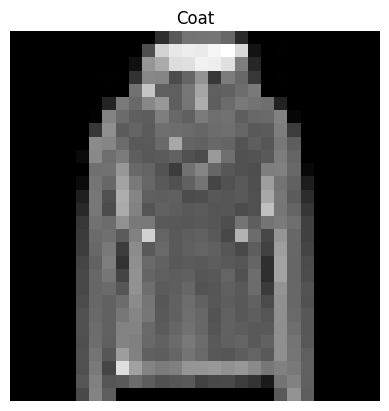

In [12]:
## show a sample
# torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch),(1,)).item()
img,label = train_features_batch[random_idx],train_labels_batch[random_idx]

plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Label:{label},Class:{class_names[label]}")
print(f"Shape:{img.shape}")






 building a baseline model

In [13]:
import torch

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [14]:
## creating a flatten layer and seeing wt it does
from torch import nn

# Ensure train_features_batch is defined
train_features_batch,train_labels_batch = next(iter(train_dataloader))

flatten_model = nn.Flatten()

#get a single sample
x = train_features_batch[0]
print(f"Shape before flattening:{x.shape}")

#flatten the sample
output = flatten_model(x)
print(f"Shape after flattening:{output.shape}")


Shape before flattening:torch.Size([1, 28, 28])
Shape after flattening:torch.Size([1, 784])


In [15]:
from torch import nn
class FastionMNISTModelV0(nn.Module):
  def __init__(self,input_shape,
               hidden_units,
               output_shape):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features = output_shape)
    )

    # creating forward method
  def forward(self,x):
    return self.layer_stack(x)

In [16]:
## setup model with input layers
torch.manual_seed(42)
model_0 = FastionMNISTModelV0(
    input_shape = 784,
    hidden_units = 10,# units in the hidden layer
    output_shape = len(class_names)# ONE FOR EVERY CLASS

).to(device)


model_0

FastionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [17]:
## setup loss function optimizer and evaluation matrics
import torch.optim as optim

# Loss function
loss_fn = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.SGD(params=model_0.parameters(), lr=0.1)

## accuracy of model
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


In [18]:
from torch.nn.modules import loss
## make predictions through the model
torch.manual_seed(42)
image,label = train_features_batch[0],train_labels_batch[0]

## calculate the model loss,accuraccy before traning
model_0_pred = model_0(image.unsqueeze(dim=0).to(device))
loss = loss_fn(model_0_pred,label.unsqueeze(dim=0).to(device))
acc = accuracy_fn(y_true=label.unsqueeze(dim=0).to(device),
                  y_pred=torch.argmax(torch.softmax(model_0_pred,dim=1),dim=1))
print(f"Loss:{loss},Accuracy:{acc}")

Loss:2.1337146759033203,Accuracy:0.0


In [19]:
from tqdm.auto import tqdm

In [59]:
## traning the model
import time # Import time module
torch.manual_seed(42)
epochs = 3

# Start timer
train_time_start_model_0 = time.perf_counter()

for epoch in tqdm(range(epochs)):
  # print(f"Epoch:{epoch}\n-------")
  train_loss = 0
  train_acc = 0

  #  tqdm for an inner progress bar
  for batch,(X,y) in tqdm(enumerate(train_dataloader)):
    model_0.train()
    X,y = X.to(device),y.to(device)
    y_pred = model_0(X)
    loss = loss_fn(y_pred,y)
    train_loss += loss.item() # Accumulate scalar loss value

    # Calculate accuracy for the current batch, moving tensors to CPU
    y_pred_labels = torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
    train_acc += accuracy_fn(y_true=y.to("cpu"),
                  y_pred=y_pred_labels.to("cpu"))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # Adjust metrics to get average loss and accuracy for the epoch
  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)

  print(f"Train loss: {train_loss:.4f}, Train accuracy: {train_acc:.2f}%")

# End timer
train_time_end_model_0 = time.perf_counter()
total_train_time_model_0 = train_time_end_model_0 - train_time_start_model_0
print(f"\nTotal training time for model 0: {total_train_time_model_0:.2f} seconds")

  0%|          | 0/3 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Train loss: 0.4439, Train accuracy: 84.46%


0it [00:00, ?it/s]

Train loss: 0.4339, Train accuracy: 84.82%


0it [00:00, ?it/s]

Train loss: 0.4286, Train accuracy: 85.07%

Total training time for model 0: 25.88 seconds


In [21]:

## making predictons with trained model

model_0.eval() # Set model to evaluation mode
all_preds = []
all_labels = []

with torch.inference_mode(): # Turn off gradient tracking for inference
    for X_test, y_test in test_dataloader:
        X_test, y_test = X_test.to(device), y_test.to(device)
        test_pred_logits = model_0(X_test)
        test_pred_labels = test_pred_logits.argmax(dim=1)
        all_preds.append(test_pred_labels)
        all_labels.append(y_test)

# Concatenate all predictions and labels
all_preds = torch.cat(all_preds)
all_labels = torch.cat(all_labels)

print(f"Number of test predictions: {len(all_preds)}")
print(f"First 10 predictions: {all_preds[:10]}")
print(f"First 10 true labels: {all_labels[:10]}")

Number of test predictions: 10000
First 10 predictions: tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])
First 10 true labels: tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])


In [22]:
## calculate the loss ande accuraccy after traning the model

# Setup eval mode
model_0.eval()

test_loss = 0
test_acc = 0

# Turn on inference mode
with torch.inference_mode():
  for X_test, y_test in test_dataloader:

    X_test, y_test = X_test.to(device), y_test.to(device)

    # 1. Forward pass
    test_pred_logits = model_0(X_test)

    # 2. Calculate loss
    test_loss += loss_fn(test_pred_logits, y_test).item()

    # 3. Calculate accuracy
    test_pred_labels = test_pred_logits.argmax(dim=1)
    test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred_labels)

  # Adjust metrics to get average loss and accuracy
  test_loss /= len(test_dataloader)
  test_acc /= len(test_dataloader)

print(f"\nTest loss: {test_loss:.4f}, Test accuracy: {test_acc:.2f}%")


Test loss: 0.5109, Test accuracy: 82.38%


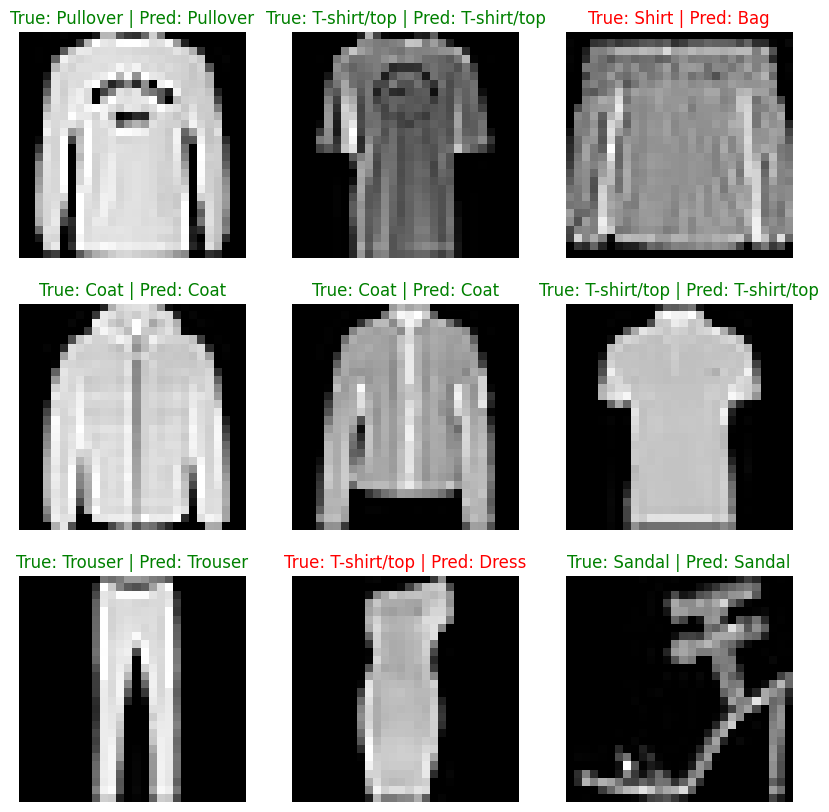

In [23]:
## visualize model performance

import matplotlib.pyplot as plt

# Make predictions on a few random test images
num_images_to_plot = 9
test_samples = []

# Get some random samples from the test_data
for sample_idx in torch.randint(0, len(test_data), size=(num_images_to_plot,)).tolist():
    test_samples.append(test_data[sample_idx])

plt.figure(figsize=(10, 10))
for i, (img, label) in enumerate(test_samples):
    plt.subplot(3, 3, i + 1)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.axis(False)

    # Prepare image for model input
    img = img.unsqueeze(0).to(device) # Add batch dimension and send to device

    # Make a prediction
    model_0.eval()
    with torch.inference_mode():
        pred_logits = model_0(img)
        pred_label = pred_logits.argmax(dim=1)

    # Get true and predicted class names
    true_class_name = class_names[label]
    predicted_class_name = class_names[pred_label.item()]

    # Set title color based on correctness
    if predicted_class_name == true_class_name:
        color = "green"
    else:
        color = "red"

    plt.title(f"True: {true_class_name} | Pred: {predicted_class_name}", color=color)

Convolutional neural networks

In [42]:
## create convolutional neural networks
class FashionMNISTModelV1(nn.Module):
  def __init__(self,input_shape,hidden_units,output_shape):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),# values we can set ourselves in our nn's are called hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)

    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # Changed from MaxPool1d to MaxPool2d
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  # forward method
  def forward(self,x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x


In [43]:
## intiate the model
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)



model_1


FashionMNISTModelV1(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [47]:
import torch.optim as optim

# Loss function - same as before, works for multi-class classification
loss_fn_cnn = nn.CrossEntropyLoss()

# Optimizer - using Adam for the CNN model, typically performs well
optimizer_cnn = optim.Adam(params=model_1.parameters(), lr=0.001)

# Accuracy function - same as before
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


In [48]:
model_1.eval()

# Get a batch of test data
with torch.inference_mode():
  X_test_sample, y_test_sample = next(iter(test_dataloader))
  X_test_sample, y_test_sample = X_test_sample.to(device), y_test_sample.to(device);

  # Make predictions
  untrained_cnn_preds = model_1(X_test_sample)

## calculate the loss function , accuracy for the untrained predictions

loss = loss_fn_cnn(untrained_cnn_preds, y_test_sample)
acc = accuracy_fn(y_true=y_test_sample, y_pred=untrained_cnn_preds.argmax(dim=1))

print(f"Loss for untrained CNN: {loss:.4f}")
print(f"Accuracy for untrained CNN: {acc:.2f}%")


Loss for untrained CNN: 2.3071
Accuracy for untrained CNN: 9.38%


In [60]:
from tqdm.auto import tqdm
import time # Import time module

# Training loop for model_1 (CNN)
torch.manual_seed(42)
epochs = 10

# Start timer
train_time_start_model_1 = time.perf_counter()

for epoch in tqdm(range(epochs)):
    # print(f"Epoch: {epoch}\n-------")
    train_loss = 0
    train_acc = 0

    # Training
    model_1.train()
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model_1(X)

        # 2. Calculate loss
        loss = loss_fn_cnn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer_cnn.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer_cnn.step()

        # Calculate accuracy
        y_pred_labels = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += accuracy_fn(y_true=y.to("cpu"), y_pred=y_pred_labels.to("cpu"))

    # Adjust metrics to get average loss and accuracy for the epoch
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)

    print(f"Train loss: {train_loss:.4f}, Train accuracy: {train_acc:.2f}%")

    # Testing
    test_loss = 0
    test_acc = 0
    model_1.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            X_test, y_test = X_test.to(device), y_test.to(device)

            # 1. Forward pass
            test_pred_logits = model_1(X_test)

            # 2. Calculate loss
            test_loss += loss_fn_cnn(test_pred_logits, y_test).item()

            # 3. Calculate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += accuracy_fn(y_true=y_test.to("cpu"), y_pred=test_pred_labels.to("cpu"))

    # Adjust metrics to get average loss and accuracy
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

    print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.2f}%\n")

# End timer
train_time_end_model_1 = time.perf_counter()
total_train_time_model_1 = train_time_end_model_1 - train_time_start_model_1
print(f"\nTotal training time for model 1: {total_train_time_model_1:.2f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Train loss: 0.2037, Train accuracy: 92.44%
Test loss: 0.2714, Test accuracy: 90.62%

Train loss: 0.2007, Train accuracy: 92.61%
Test loss: 0.2797, Test accuracy: 90.21%

Train loss: 0.1984, Train accuracy: 92.73%
Test loss: 0.2823, Test accuracy: 90.72%

Train loss: 0.1958, Train accuracy: 92.80%
Test loss: 0.2794, Test accuracy: 90.56%

Train loss: 0.1937, Train accuracy: 92.84%
Test loss: 0.2890, Test accuracy: 90.25%

Train loss: 0.1938, Train accuracy: 92.80%
Test loss: 0.2726, Test accuracy: 90.42%

Train loss: 0.1898, Train accuracy: 92.96%
Test loss: 0.2725, Test accuracy: 90.21%

Train loss: 0.1887, Train accuracy: 93.12%
Test loss: 0.2752, Test accuracy: 90.68%

Train loss: 0.1872, Train accuracy: 93.09%
Test loss: 0.2686, Test accuracy: 90.84%

Train loss: 0.1853, Train accuracy: 93.11%
Test loss: 0.2927, Test accuracy: 90.34%


Total training time for model 1: 497.15 seconds


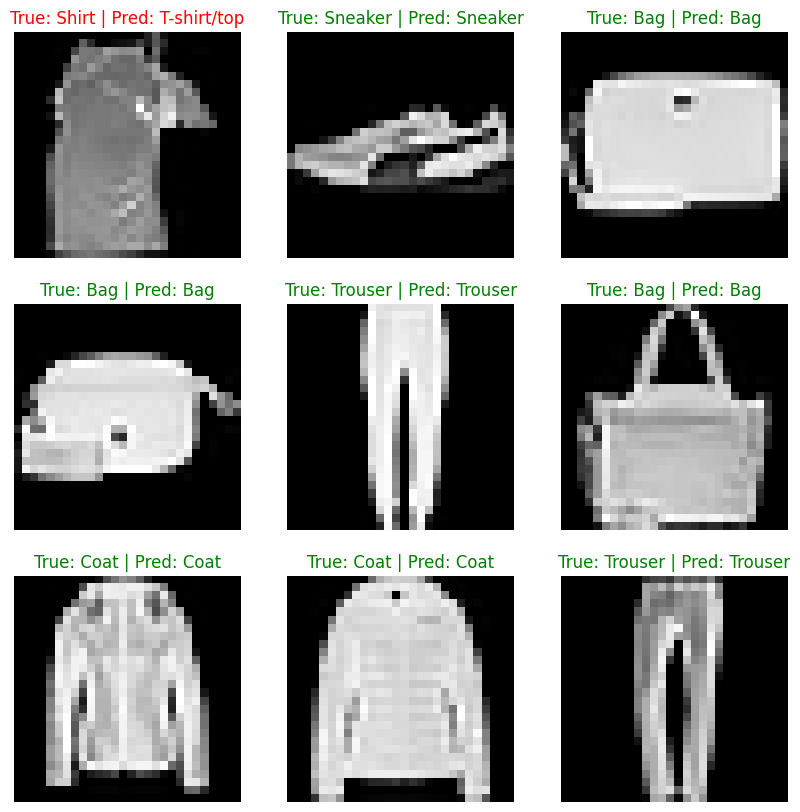

In [54]:
import matplotlib.pyplot as plt

# Make predictions on a few random test images
num_images_to_plot = 9
test_samples = []

# Get some random samples from the test_data
for sample_idx in torch.randint(0, len(test_data), size=(num_images_to_plot,)).tolist():
    test_samples.append(test_data[sample_idx])

plt.figure(figsize=(10, 10))
for i, (img, label) in enumerate(test_samples):
    plt.subplot(3, 3, i + 1)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.axis(False)

    # Prepare image for model input
    img = img.unsqueeze(0).to(device) # Add batch dimension and send to device

    # Make a prediction
    model_1.eval()
    with torch.inference_mode():
        pred_logits = model_1(img)
        pred_label = pred_logits.argmax(dim=1)

    # Get true and predicted class names
    true_class_name = class_names[label]
    predicted_class_name = class_names[pred_label.item()]

    # Set title color based on correctness
    if predicted_class_name == true_class_name:
        color = "green"
    else:
        color = "red"

    plt.title(f"True: {true_class_name} | Pred: {predicted_class_name}", color=color)

In [55]:
# Setup eval mode
model_1.eval()

test_loss = 0
test_acc = 0

# Turn on inference mode
with torch.inference_mode():
  for X_test, y_test in test_dataloader:

    X_test, y_test = X_test.to(device), y_test.to(device)

    # 1. Forward pass
    test_pred_logits = model_1(X_test)

    # 2. Calculate loss
    test_loss += loss_fn_cnn(test_pred_logits, y_test).item()

    # 3. Calculate accuracy
    test_pred_labels = test_pred_logits.argmax(dim=1)
    test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred_labels)

  # Adjust metrics to get average loss and accuracy
  test_loss /= len(test_dataloader)
  test_acc /= len(test_dataloader)

print(f"\nTest loss: {test_loss:.4f}, Test accuracy: {test_acc:.2f}%")



Test loss: 0.2911, Test accuracy: 90.11%


In [57]:
# Evaluate model_0 to get its final test metrics
model_0.eval()

model_0_test_loss = 0
model_0_test_acc = 0

with torch.inference_mode():
  for X_test, y_test in test_dataloader:
    X_test, y_test = X_test.to(device), y_test.to(device)
    test_pred_logits = model_0(X_test)
    model_0_test_loss += loss_fn(test_pred_logits, y_test).item()
    test_pred_labels = test_pred_logits.argmax(dim=1)
    model_0_test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred_labels)

model_0_test_loss /= len(test_dataloader)
model_0_test_acc /= len(test_dataloader)

print(f"Model 0 test loss: {model_0_test_loss:.4f}, Model 0 test accuracy: {model_0_test_acc:.2f}%")


Model 0 test loss: 0.5109, Model 0 test accuracy: 82.38%


In [61]:
import pandas as pd

# Get model_1's latest test metrics (already available in test_loss and test_acc variables from last run)
model_1_test_loss = test_loss
model_1_test_acc = test_acc

compare_results = pd.DataFrame({
    "model_name": ["model_0_baseline", "model_1_cnn"],
    "model_loss": [model_0_test_loss, model_1_test_loss],
    "model_accuracy": [model_0_test_acc, model_1_test_acc],
    "training_time": [total_train_time_model_0, total_train_time_model_1]
})

display(compare_results)


,model_name,model_loss,model_accuracy,training_time
0,model_0_baseline,0.510876,82.378195,25.879102
1,model_1_cnn,0.292655,90.335463,497.150233


/tmp/ipython-input-194/501616045.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model_name', y='model_accuracy', data=compare_results, ax=axes[0], palette='viridis')
/tmp/ipython-input-194/501616045.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model_name', y='training_time', data=compare_results, ax=axes[1], palette='magma')


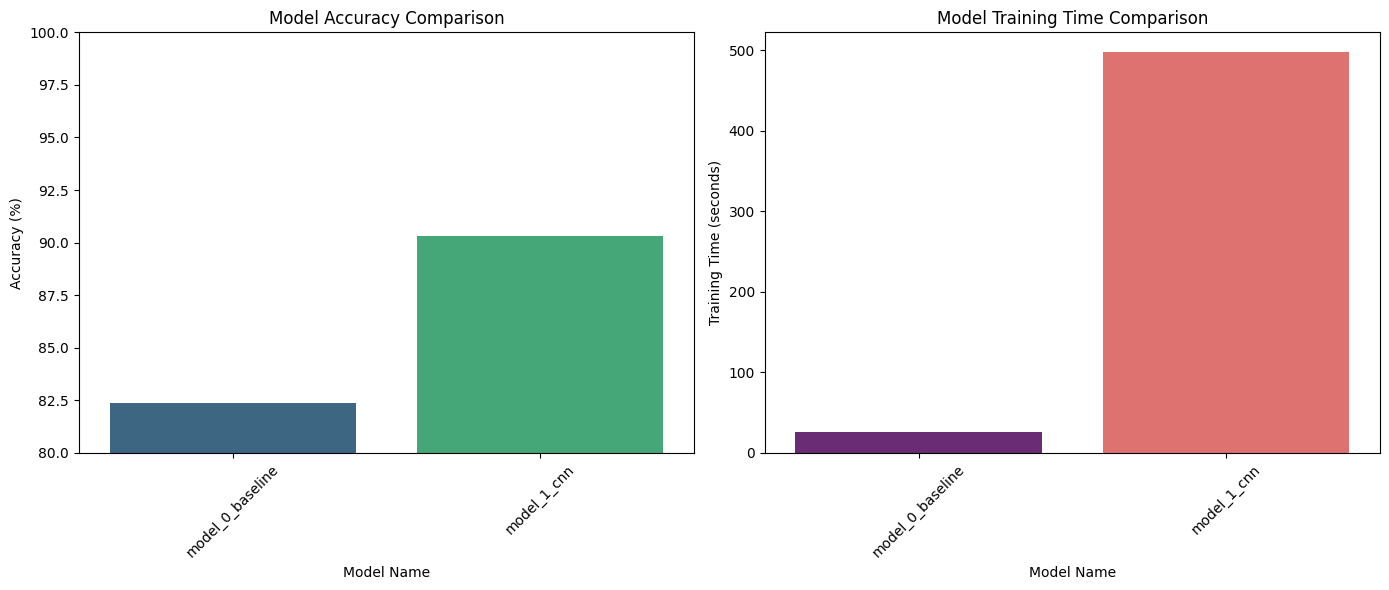

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Accuracy
sns.barplot(x='model_name', y='model_accuracy', data=compare_results, ax=axes[0], palette='viridis')
axes[0].set_title('Model Accuracy Comparison')
axes[0].set_ylabel('Accuracy (%)')
axes[0].set_xlabel('Model Name')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim(80, 100) # Set reasonable limits for accuracy

# Plot for Training Time
sns.barplot(x='model_name', y='training_time', data=compare_results, ax=axes[1], palette='magma')
axes[1].set_title('Model Training Time Comparison')
axes[1].set_ylabel('Training Time (seconds)')
axes[1].set_xlabel('Model Name')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

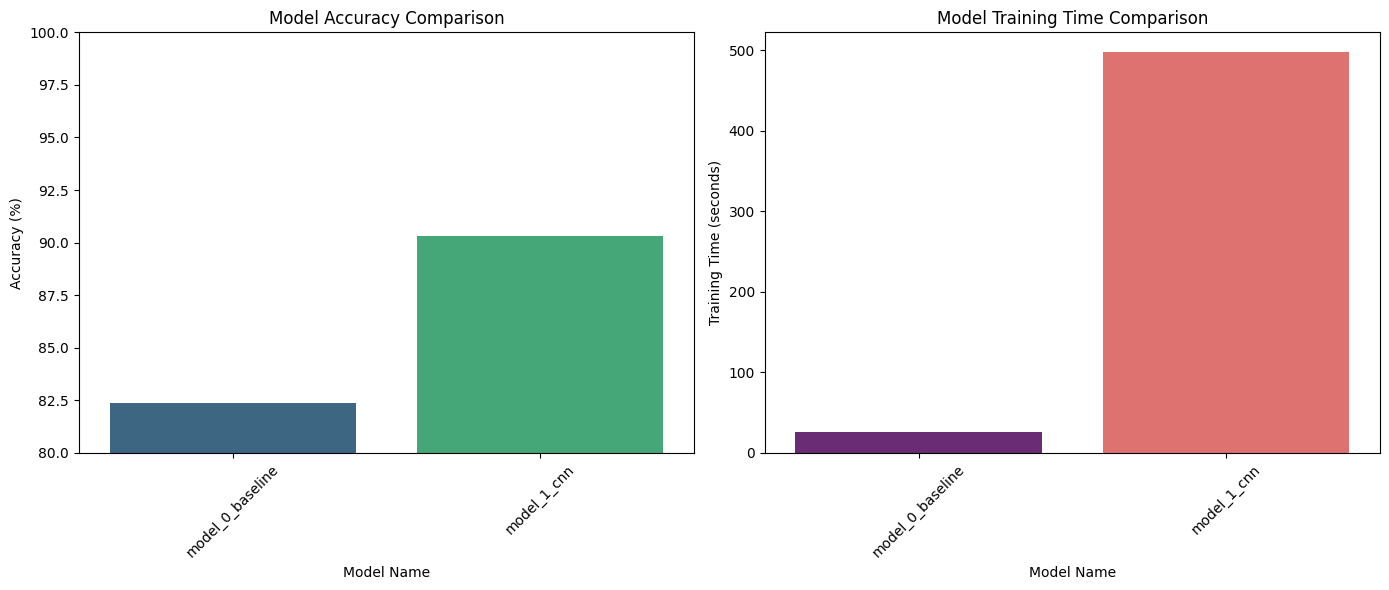

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Accuracy
sns.barplot(x='model_name', y='model_accuracy', data=compare_results, ax=axes[0], palette='viridis', hue='model_name', legend=False)
axes[0].set_title('Model Accuracy Comparison')
axes[0].set_ylabel('Accuracy (%)')
axes[0].set_xlabel('Model Name')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim(80, 100) # Set reasonable limits for accuracy

# Plot for Training Time
sns.barplot(x='model_name', y='training_time', data=compare_results, ax=axes[1], palette='magma', hue='model_name', legend=False)
axes[1].set_title('Model Training Time Comparison')
axes[1].set_ylabel('Training Time (seconds)')
axes[1].set_xlabel('Model Name')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()